# Exploratory Analysis of College Majors vs Salaries

### 1. Setup

In [34]:
import pandas as pd
import matplotlib as plt
from pandas.plotting import scatter_matrix
%matplotlib inline

### 2. Initial Observation of Data

In [2]:
recent_grads = pd.read_csv("recent-grads.csv")

In [3]:
recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

#### Description of Columns of the gived data:
**Rank** - Rank by median earnings
<br>**Major_code** - College major code
<br>**Major** - Major description
<br>**Major_category** - Category of major
<br>**Total** - Total number of people with major
<br>**Sample_size** - Sample size (unweighted) of full-time employees
<br>**Men** - Male graduates
<br>**Women** - Female graduates
<br>**ShareWomen** - Women as share of total
<br>**Employed** - Number employed
<br>**Median** - Median salary of year-round workers
<br>**Low_wage_jobs** - Number of workers in low-wage service jobs
<br>**Full_time** - Number of workers employed 35 hours or more
<br>**Part_time** - Number employed less than 35 hours

In [4]:
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [5]:
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [6]:
recent_grads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
Rank                    173 non-null int64
Major_code              173 non-null int64
Major                   173 non-null object
Total                   172 non-null float64
Men                     172 non-null float64
Women                   172 non-null float64
Major_category          173 non-null object
ShareWomen              172 non-null float64
Sample_size             173 non-null int64
Employed                173 non-null int64
Full_time               173 non-null int64
Part_time               173 non-null int64
Full_time_year_round    173 non-null int64
Unemployed              173 non-null int64
Unemployment_rate       173 non-null float64
Median                  173 non-null int64
P25th                   173 non-null int64
P75th                   173 non-null int64
College_jobs            173 non-null int64
Non_college_jobs        173 non-null int64
Low_wage_jobs          

In [7]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [8]:
recent_grads.isnull().sum()

Rank                    0
Major_code              0
Major                   0
Total                   1
Men                     1
Women                   1
Major_category          0
ShareWomen              1
Sample_size             0
Employed                0
Full_time               0
Part_time               0
Full_time_year_round    0
Unemployed              0
Unemployment_rate       0
Median                  0
P25th                   0
P75th                   0
College_jobs            0
Non_college_jobs        0
Low_wage_jobs           0
dtype: int64

#### Observations Summary
1. Pandas read the "Rank" and "Major Code" as Integers, however, this should be categorical data
2. There is one null row in columns "Total", "Men", "Women"

### 3. Data Cleaning

#### Dropping the null rows

In [9]:
recent_grads = recent_grads.dropna()
recent_grads = recent_grads.reset_index(drop=True)
recent_grads.isnull().sum()

Rank                    0
Major_code              0
Major                   0
Total                   0
Men                     0
Women                   0
Major_category          0
ShareWomen              0
Sample_size             0
Employed                0
Full_time               0
Part_time               0
Full_time_year_round    0
Unemployed              0
Unemployment_rate       0
Median                  0
P25th                   0
P75th                   0
College_jobs            0
Non_college_jobs        0
Low_wage_jobs           0
dtype: int64

### 4. Exploratory Visualization

####  4.1 Exploring Column Relations via Visualization

Do students in more popular majors earn higher salaries?

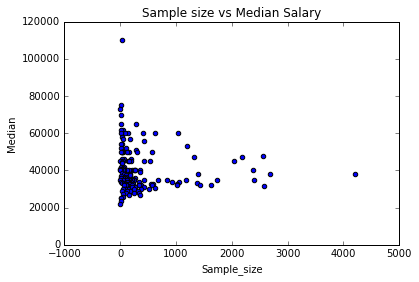

In [10]:
ax = recent_grads.plot(x="Sample_size", y="Median", kind="scatter")
ax.set_title("Sample size vs Median Salary")

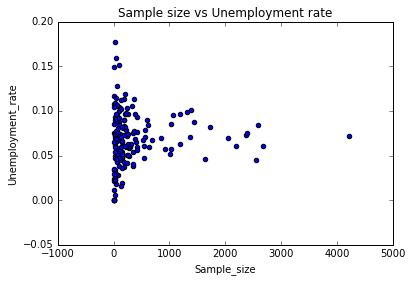

In [11]:
ax = recent_grads.plot(x="Sample_size", y="Unemployment_rate", kind="scatter")
ax.set_title("Sample size vs Unemployment rate")

Do students in more female populated majors earn higher salaries?

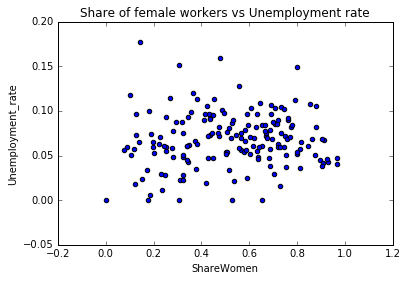

In [12]:
ax = recent_grads.plot(x="ShareWomen", y="Unemployment_rate", kind="scatter")
ax.set_title("Share of female workers vs Unemployment rate")

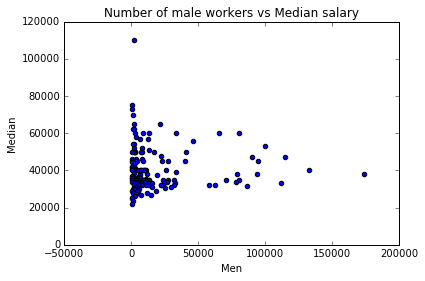

In [13]:
ax = recent_grads.plot(x="Men", y="Median", kind="scatter")
ax.set_title("Number of male workers vs Median salary")

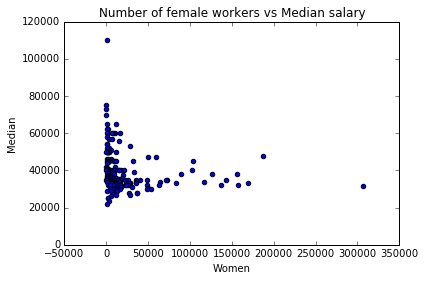

In [14]:
ax = recent_grads.plot(x="Women", y="Median", kind="scatter")
ax.set_title("Number of female workers vs Median salary")

Is there a relation between the number of full-time employees and median salary?

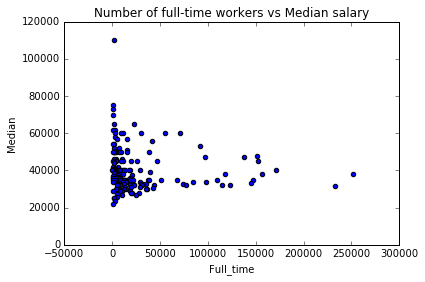

In [15]:
ax = recent_grads.plot(x="Full_time", y="Median", kind="scatter")
ax.set_title("Number of full-time workers vs Median salary")

#### 4.2 Distributions of Data

In [16]:
recent_grads["Sample_size"].describe()

count     172.000000
mean      357.941860
std       619.680419
min         2.000000
25%        42.000000
50%       131.000000
75%       339.000000
max      4212.000000
Name: Sample_size, dtype: float64

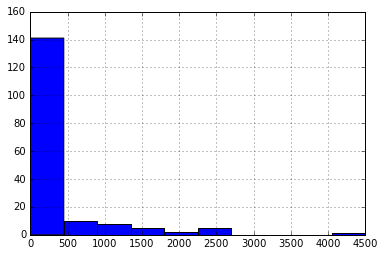

In [17]:
recent_grads["Sample_size"].hist(bins=10, range=(0,4500))

In [18]:
recent_grads["Sample_size"].value_counts()

22      3
4       3
7       3
118     2
5       2
156     2
158     2
55      2
425     2
37      2
36      2
184     2
31      2
30      2
26      2
24      2
142     2
10      2
95      2
3       2
97      2
342     2
73      1
51      1
565     1
310     1
88      1
56      1
569     1
59      1
       ..
259     1
4212    1
113     1
623     1
1387    1
46      1
362     1
264     1
103     1
357     1
39      1
419     1
2684    1
125     1
126     1
128     1
130     1
132     1
353     1
590     1
8       1
2189    1
399     1
147     1
919     1
152     1
2584    1
157     1
1186    1
1024    1
Name: Sample_size, Length: 147, dtype: int64

In [19]:
recent_grads["Median"].describe()

count       172.000000
mean      40076.744186
std       11461.388773
min       22000.000000
25%       33000.000000
50%       36000.000000
75%       45000.000000
max      110000.000000
Name: Median, dtype: float64

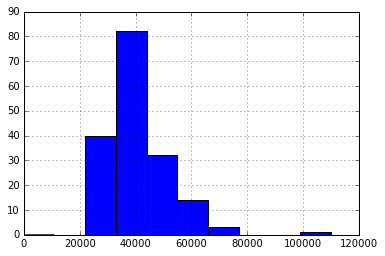

In [20]:
recent_grads["Median"].hist(bins=10, range=(0,110000))

In [21]:
recent_grads["Employed"].describe()

count       172.00000
mean      31355.80814
std       50777.42865
min           0.00000
25%        3734.75000
50%       12031.50000
75%       31701.25000
max      307933.00000
Name: Employed, dtype: float64

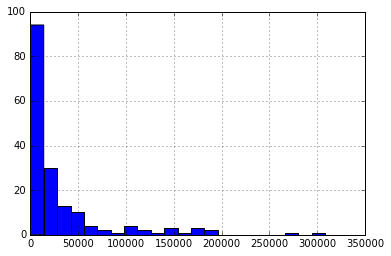

In [22]:
recent_grads["Employed"].hist(bins=25, range=(0,350000))

In [23]:
recent_grads["Full_time"].describe()

count       172.000000
mean      26165.767442
std       42957.122320
min         111.000000
25%        3181.000000
50%       10073.500000
75%       25447.250000
max      251540.000000
Name: Full_time, dtype: float64

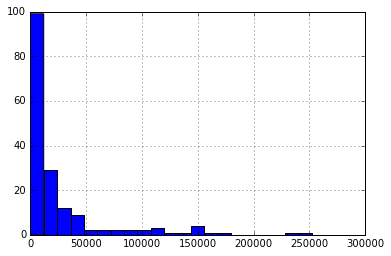

In [24]:
recent_grads["Full_time"].hist(bins=25, range=(0,300000))

In [25]:
recent_grads["ShareWomen"].describe()

count    172.000000
mean       0.522223
std        0.231205
min        0.000000
25%        0.336026
50%        0.534024
75%        0.703299
max        0.968954
Name: ShareWomen, dtype: float64

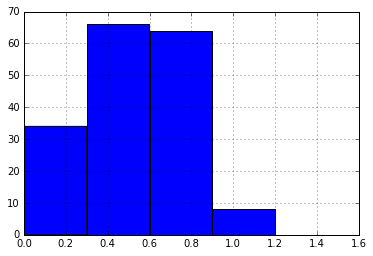

In [26]:
recent_grads["ShareWomen"].hist(bins=5, range=(0,1.5))

In [27]:
recent_grads["Unemployment_rate"].describe()

count    172.000000
mean       0.068024
std        0.030340
min        0.000000
25%        0.050261
50%        0.067544
75%        0.087247
max        0.177226
Name: Unemployment_rate, dtype: float64

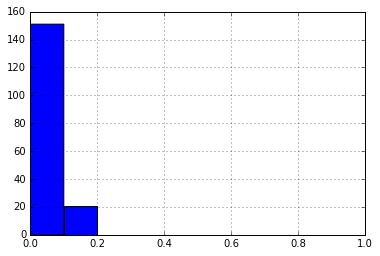

In [28]:
recent_grads["Unemployment_rate"].hist(bins=10, range=(0,1))

In [29]:
recent_grads["Men"].describe()

count       172.000000
mean      16723.406977
std       28122.433474
min         119.000000
25%        2177.500000
50%        5434.000000
75%       14631.000000
max      173809.000000
Name: Men, dtype: float64

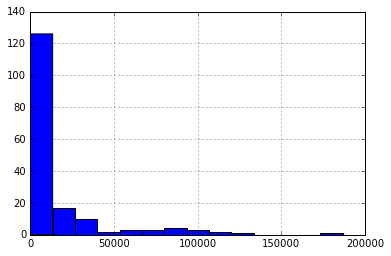

In [30]:
recent_grads["Men"].hist(bins=15, range=(0,200000))

In [31]:
recent_grads["Women"].describe()

count       172.000000
mean      22646.674419
std       41057.330740
min           0.000000
25%        1778.250000
50%        8386.500000
75%       22553.750000
max      307087.000000
Name: Women, dtype: float64

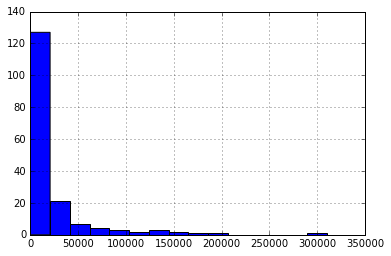

In [32]:
recent_grads["Women"].hist(bins=15, range=(0,310000))

#### 4.3 Comparison via scatter matrix 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f31702cde80>,
      dtype=object)

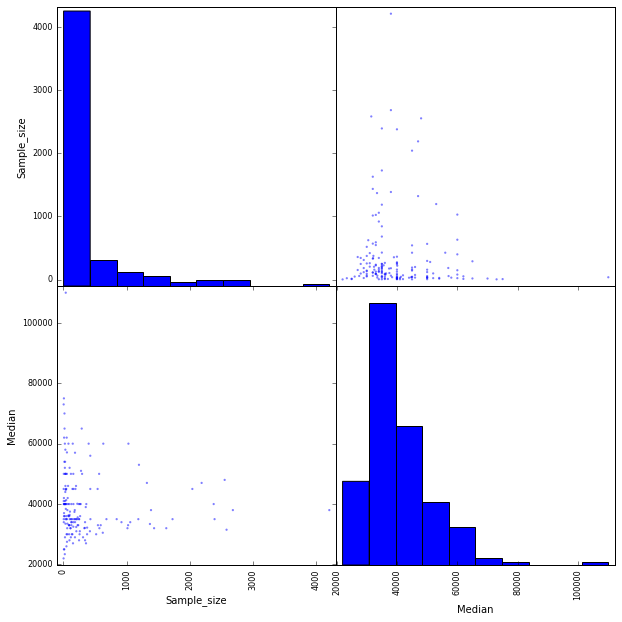

In [35]:
scatter_matrix(recent_grads[["Sample_size", "Median"]], figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f31700ec048>,
      dtype=object)

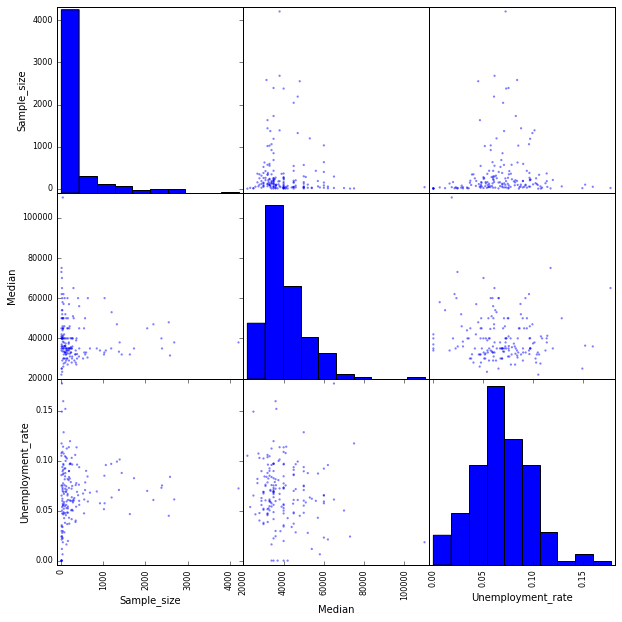

In [36]:
scatter_matrix(recent_grads[["Sample_size", "Median", "Unemployment_rate"]], figsize=(10,10))

#### 4.4 Comparison via bar plots

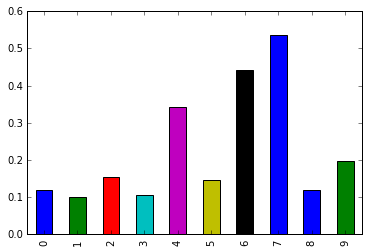

In [37]:
recent_grads[:10]["ShareWomen"].plot(kind="bar")

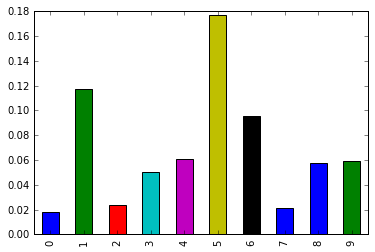

In [40]:
recent_grads[:10]["Unemployment_rate"].plot(kind="bar")

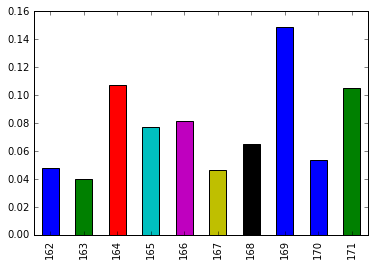

In [46]:
recent_grads[-10:]["Unemployment_rate"].plot(kind="bar")